In this notebook, I will use the data of the water feature in different neighberhood in city of Pittsburgh to find out whihc neighborhood is best for rising a 
child.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
water_feature = pd.read_csv("Water Features.csv")

In [4]:
drink_fountain = dict()
spray = dict()
for d in range (len(water_feature)):
    item = water_feature.at[d,'neighborhood']
    df = str(water_feature.at[d,'feature_type'])
    inactive = str(water_feature.at[d,"inactive"])
    if df == "Drinking Fountain" and inactive =="f":
        if item not in drink_fountain:
            drink_fountain[item] = 1
        else:
            drink_fountain[item] += 1
    elif df == "Spray"and inactive =="f":
        if item not in spray:
            spray[item] = 1
        else:
            spray[item] += 1

In [9]:
drink_fountain_ser = pd.Series(drink_fountain, name = "Drinking Fountains")
drink_fountain_ser.sort_values(ascending = False)[:15]

Squirrel Hill South    12
Highland Park          10
Brookline               7
Perry North             7
Elliott                 6
Troy Hill               5
Mount Washington        5
Beechview               5
Brighton Heights        4
Bloomfield              4
Carrick                 4
North Oakland           3
Regent Square           3
Point Breeze            3
Morningside             3
Name: Drinking Fountains, dtype: int64

Text(0, 0.5, 'Active Drinking Fountain')

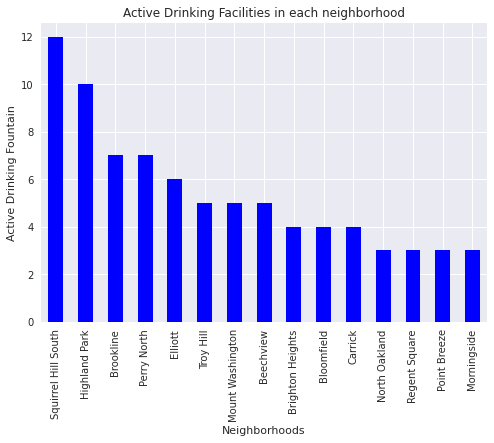

In [10]:
plt.style.use("seaborn")
drink_fountain_ser.sort_values(ascending = False)[:15].plot.bar(drink_fountain_ser,color = 'b')
plt.title("Active Drinking Facilities in each neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Active Drinking Fountain")

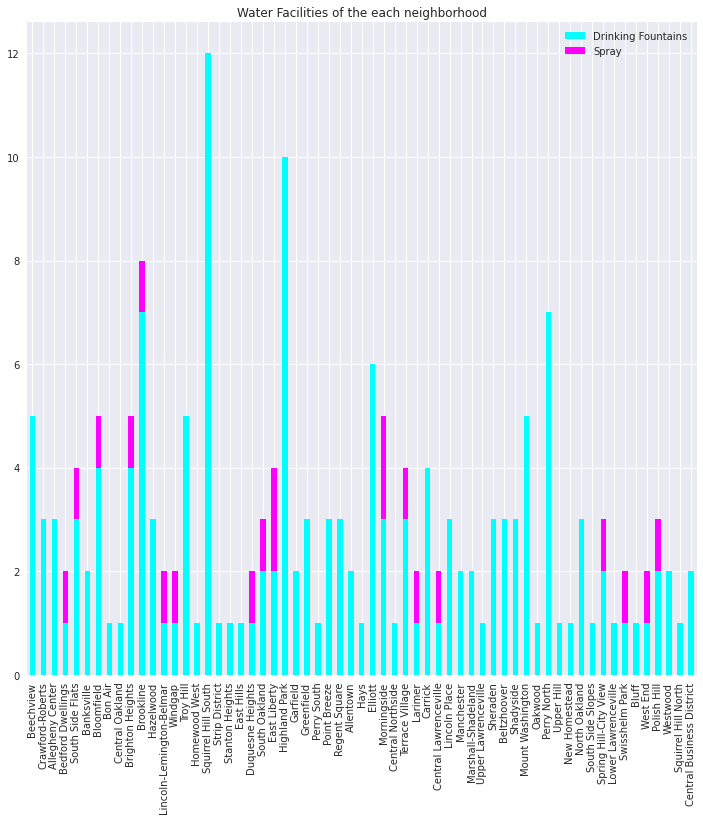

In [7]:
Spray_serise = pd.Series(spray,name = "Spray")
water_facility = pd.DataFrame(drink_fountain_ser).join(Spray_serise)
water_facility.plot.bar(stacked=True, title="Water Facilities of the each neighborhood", colormap = "cool",figsize=(12, 12))

Text(0, 0.5, 'Active Water Facilities')

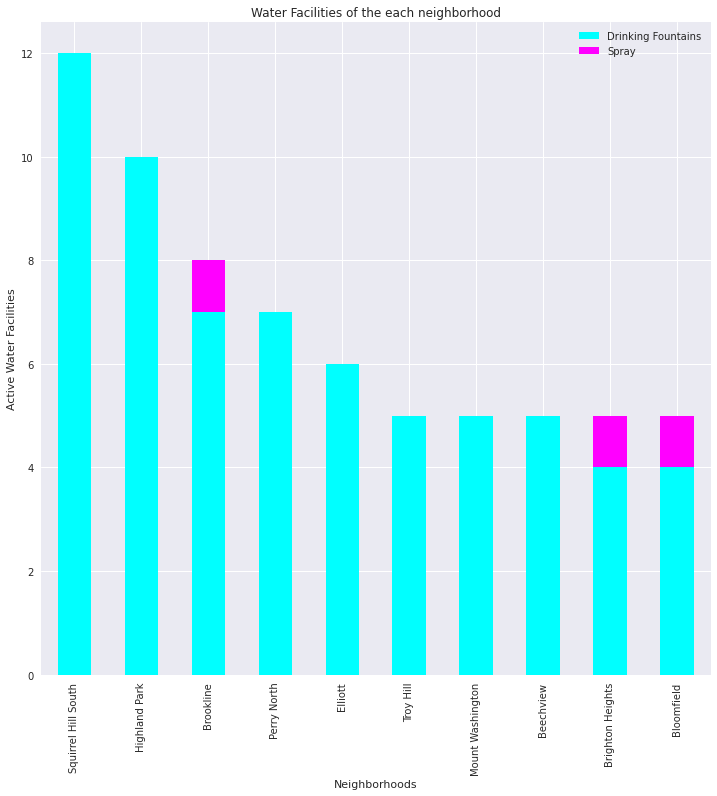

In [12]:
Spray_serise = pd.Series(spray,name = "Spray")
water_facility = pd.DataFrame(drink_fountain_ser).join(Spray_serise)
water_facility.sort_values(by = ["Drinking Fountains"],ascending = False)[:10].plot.bar(stacked=True, title="Water Facilities of the each neighborhood", colormap = "cool",figsize=(12, 12))
plt.rcParams.update({'font.size': 50})
plt.xlabel("Neighborhoods")
plt.ylabel("Active Water Facilities")